#3.1.1 Step -1- Data Understanding, Analysis and Preparations:

In this step we will read the data, understand the data, perform some basic data cleaning, and store everything in the matrix as shown below.

• Requirements:

Dataset → student.csv

• Decision Process:

In this step we will define the objective of the task.

– Objective of the Task -

To Predict the marks obtained in writing based on the marks of Math and Reading.

**• To - Do - 1:**
1. Read and Observe the Dataset.
2. Print top(5) and bottom(5) of the dataset {Hint: pd.head and pd.tail}.
3. Print the Information of Datasets. {Hint: pd.info}.
4. Gather the Descriptive info about the Dataset. {Hint: pd.describe}
5. Split your data into Feature (X) and Label (Y).

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/student.csv')
df

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62
...,...,...,...
995,72,74,70
996,73,86,90
997,89,87,94
998,83,82,78


In [10]:
df.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [11]:
df.tail()

,Math,Reading,Writing
995,72,74,70
996,73,86,90
997,89,87,94
998,83,82,78
999,66,66,72


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [5]:
df.describe()

,Math,Reading,Writing
count,1000.000000,1000.000000,1000.000000
mean,67.290000,69.872000,68.616000
std,15.085008,14.657027,15.241287
min,13.000000,19.000000,14.000000
25%,58.000000,60.750000,58.000000
50%,68.000000,70.000000,69.500000
75%,78.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000


In [13]:
X = df[['Reading', 'Writing']]
Y = df['Math']
print(":Features:\n", X)
print(":Labels:\n", Y)

:Features:
      Reading  Writing
0         68       63
1         81       72
2         80       78
3         83       79
4         64       62
..       ...      ...
995       74       70
996       86       90
997       87       94
998       82       78
999       66       72

[1000 rows x 2 columns]
:Labels:
 0      48
1      62
2      79
3      76
4      59
       ..
995    72
996    73
997    89
998    83
999    66
Name: Math, Length: 1000, dtype: int64


**• To - Do - 2:**
1. To make the task easier - let’s assume there is no bias or intercept.
2. Create the following matrices:
Y = WTX

In [14]:
import numpy as np
X = df[['Reading', 'Writing']].values
Y = df['Math'].values #True label
W = np.array([1, 1])
Y1 = np.dot(X, W.T) #Predicted label
print(Y1)

[131 153 158 162 126 169 167  89 158 155 133 178  89 155 140  90 147  92
 175 147 111 132 147 101 170 173 134 141 155 160 151 173 146 134  87 127
 103 156 142  90 173 147 123 102 140 147 103 151 200 155 200 176 159  99
 100  93 103  93 136 159 113 183 190 161  85 177 141 166 121 116 121 114
  96 125 133 112 129  95 150 128 162 160 145 156  91 131 176 156 160 170
 104 141 151 147 129 143 122 130 200 167  57 104 156 113  80 157 143  93
 154  89 141 159 175 177 103 164 112 150 171 155 143 154 170 121 102  92
  80 115 138 164 150 159 135 109 111 155 161 159 189 160 125 195 146 130
 123 173 131 200 156 117 122 168 145 116 115  95 172 148 124 147 167 128
  83 142 131 151 170 147 143 187 122 148 125 119 144 179 163 127 151 127
 135 113 138 126 137 169 156 172 164 165 118 179 118 138 110 155 169 128
 154 151 182 146 132 138 171  95 117  96 158 124 114 118 152 119 135 194
  94 185 119 164  99 149 122 165 165 158 134 141 131 135 121 125 148 149
 158 172 165  85 143 156 151  72 146  91 128 156 10

**• To - Do - 3:**
1. Split the dataset into training and test sets.
2. You can use an 80-20 or 70-30 split, with 80% (or 70%) of the data used for training and the rest
for testing.

In [15]:
def train_test_split_scratch(X, Y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = Y[train_indices]
    y_test = Y[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(X, Y, test_size=0.3)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (700, 2)
Shape of X_test: (300, 2)
Shape of y_train: (700,)
Shape of y_test: (300,)


#3.1.2 Step -2- Build a Cost Function:

Cost function is the average of loss function measured across the data point. As the cost function for Regression
problem we will be using Mean Square Error which is given by:

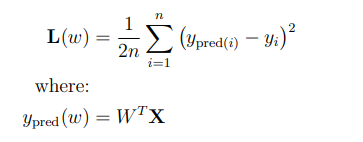L

where:

ypred(w) = WTX

Feel free to build your own code or complete the following code

In [16]:
#Define the cost function
def cost_function(Y1, Y):
  cost = np.mean((Y1-Y)**2) # Mean Squeared Error
  return cost

cost = cost_function(Y1, Y)
if cost == 0:
  print("Proceed Further")
else:
  print("something went wrong: Reimplement a cost function")
  print("Cost function output:", cost)

something went wrong: Reimplement a cost function
Cost function output: 5443.882



#3.1.3 Step -3- Gradient Descent for Simple Linear Regression:
Implementation Steps {How to Write in a Code?}:
1. Calculate the predicted values using the current parameters:

Ypred = w1 · X
2. Compute the loss function:

loss = Ypred − Y
3. Compute the gradients for each parameter:

dw1 =
1
m
X(loss · X)
4. Update the parameters:

w1 = w1 − α · dw1
5. Repeat steps 1-4 for the specified number of iterations or until convergence.

In [17]:
def gradient_descent(X, Y, W, alpha, iterations):
  cost_history = []
# Number of samples
  m = len(Y)
  for iteration in range(iterations):
# Step 1: Hypothesis Values
    Y1 = np.dot(X, W)
# Step 2: Difference between Hypothesis and Actual Y
    loss = Y1 - Y
# Step 3: Gradient Calculation
    dw = (1 / m) * np.dot(X.T, loss)
# Step 4: Updating Values of W using Gradient
    W = W - alpha * dw
# Step 5: New Cost Value
    cost = cost_function(Y1, Y)
    cost_history.append(cost)
  return W, cost_history
# Generate random test data
np.random.seed(0) # For reproducibility
X_train = np.random.rand(100, 3) # 100 samples, 3 features
Y_train = np.random.rand(100)
W_train = np.random.rand(3) # Initial guess for parameters
# Set hyperparameters
alpha = 0.01
iterations = 1000
# Test the gradient_descent function
final_params, cost_history = gradient_descent(X_train, Y_train, W_train, alpha, iterations)
# Print the final parameters and cost history
print("Final Parameters:", final_params)
print("Cost History:", cost_history)


Final Parameters: [0.20551667 0.54295081 0.10388027]
Cost History: [0.21577594919164944, 0.21422394189320307, 0.21269761199879803, 0.21119652631361233, 0.20972025896641117, 0.2082683912857068, 0.2068405116780125, 0.2054362155081552, 0.2040551049816124, 0.20269678902883861, 0.2013608831915474, 0.2000470095109174, 0.19875479641768753, 0.19748387862411218, 0.19623389701774197, 0.1950044985570019, 0.1937953361685344, 0.19260606864627902, 0.19143636055225827, 0.1902858821190413, 0.18915430915385684, 0.18804132294432793, 0.1869466101658003, 0.18586986279023826, 0.18481077799666035, 0.18376905808309085, 0.182744410379999, 0.18173654716520246, 0.18074518558021005, 0.17977004754797835, 0.17881085969206015, 0.17786735325711905, 0.17693926403078863, 0.17602633226685335, 0.17512830260972773, 0.1742449240202133, 0.17337594970251013, 0.1725211370324641, 0.17168024748702557, 0.17085304657490266, 0.17003930376838602, 0.1692387924363272, 0.16845128977824977, 0.16767657675957526, 0.1669144380479437, 0.1

#3.1.4 Step -4- Evaluate the Model:

Evaluation in Machine Learning measures the goodness of fit of your build model. Lets see How Good is
model we designed above, as discussed in the class for regression we can use following function as evaluation
measure.

**1. Root Mean Square Error:**

The Root Mean Squared Error (RMSE) is a commonly used metric for measuring the average magnitude of
the errors between predicted and actual values. It is given by the following formula:

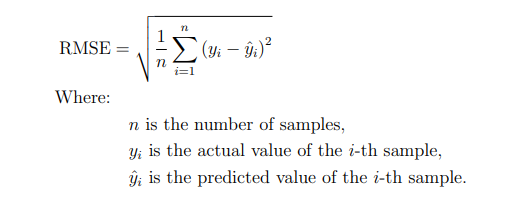

In [18]:
# Model Evaluation - RMSE
def rmse(Y1, Y):
  """
This Function calculates the Root Mean Squres.
Input Arguments:
Y: Array of actual(Target) Dependent Varaibles.
Y_pred: Array of predeicted Dependent Varaibles.
Output Arguments:
rmse: Root Mean Square.
  """
  mse = cost_function(Y1, Y)
  rmse = np.sqrt(mse)
  return rmse

rmse_value = rmse(Y1, Y)
print("RSME: ", rmse_value)

RSME:  73.78266734132075


**2. R2 or Coefficient of Determination:**

R-squared, or the coefficient of determination, measures the proportion of the variance in the dependent
variable that is predictable from the independent variables. It is given by the formula:

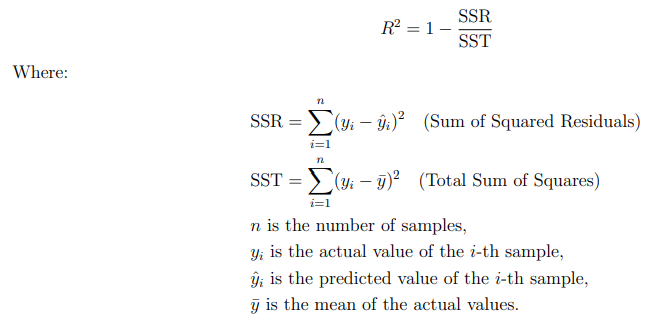


In [19]:
# Model Evaluation - R2
def r2(Y, Y_pred):
  """
This Function calculates the R Squared Error.
Parameters:
This function finds the Mean Square Error.
Input parameters:
X: Feature Matrix
Y: Target Matrix
W: Weight Matrix
Output Parameters:
cost: accumulated mean square error.
  """
  mean_y = np.mean(Y)
  ss_tot = np.sum((Y - mean_y)**2)
  ss_res = np.sum((Y - Y1)**2)
  r2 = 1 - (ss_res/ss_tot)
  return r2
coef_of_det = r2(Y, Y1)
print(coef_of_det)

-22.947056678421973


#3.1.5 Step -5- Main Function to Integrate All Steps:

**• To - Do:**

We will define a function that:
1. Loads the data and splits it into training and test sets.
2. Prepares the feature matrix (X) and target vector (Y).
3. Defines the weight matrix (W) and initializes the learning rate and number of iterations.
4. Calls the gradient descent function to learn the parameters.
5. Evaluates the model using RMSE and R2


In [20]:
# Main Function
def main():
# Step 1: Load the dataset
  df = pd.read_csv('/content/drive/MyDrive/student.csv')
# Step 2: Split the data into features (X) and target (Y)
  X = df[['Reading', 'Writing']].values # Features: Math and Reading marks
  Y = df['Math'].values # Target: Writing marks
# Step 3: Split the data into training and test sets (70% train, 30% test)
  X_train, X_test, Y_train, Y_test = train_test_split_scratch(X, Y, test_size=0.3, random_seed=42)
# Step 4: Initialize weights (W) to zeros, learning rate and number of iterations
  W = np.zeros(X_train.shape[1]) # Initialize weights
  alpha = 0.00001 # Learning rate
  iterations = 1000 # Number of iterations for gradient descent
# Step 5: Perform Gradient Descent
  W_optimal, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)
# Step 6: Make predictions on the test set
  Y_pred = np.dot(X_test, W_optimal)
# Step 7: Evaluate the model using RMSE and R-Squared
  model_rmse = rmse(Y1, Y)
  model_r2 = r2(Y, Y_pred)
# Step 8: Output the results
  print("Final Weights:", W_optimal)
  print("Cost History (First 10 iterations):", cost_history[:10])
  print("RMSE on Test Set:", model_rmse)
  print("R-Squared on Test Set:", model_r2)
# Execute the main function
if __name__ == "__main__":
  main()


Final Weights: [0.50281693 0.46062298]
Cost History (First 10 iterations): [4741.595714285714, 3852.5083088454803, 3132.968851150978, 2550.6447375197963, 2079.3691555689893, 1697.9652747219131, 1389.2946622681225, 1139.4871654145732, 937.3176539668865, 773.7016174830445]
RMSE on Test Set: 73.78266734132075
R-Squared on Test Set: -22.947056678421973
